<a href="https://colab.research.google.com/github/yuktimittal/Emotion-Classification-using-EEG-Brain-waves/blob/master/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir(r'/content/drive/My Drive/Colab Notebooks')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
file_x = 'data/32/features_raw.dat'
X = np.genfromtxt(file_x, delimiter=' ')
file_y = "data/label_class_0_3.5.dat"
y = np.genfromtxt(file_y, delimiter=' ')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
      
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_train_pd=pd.DataFrame(X_train)
X_test_pd=pd.DataFrame(X_test)

In [ ]:
def f(xx):
      try:
        if float(xx)<0.05:
          return xx
      except:
        return NaN
        
from sklearn.feature_selection import SelectKBest, f_classif
X_indices = np.arange(X.shape[-1])
selector = SelectKBest(f_classif)
selector.fit(X_train, y_train)
dell1=pd.DataFrame(selector.pvalues_,columns=None)
dell1[0]=dell1[0].apply(f)
l=dell1.dropna().to_dict()[0].keys()
X_train_pd=X_train_pd[l]
X_test_pd=X_test_pd[l]
X_train=X_train_pd.to_numpy()
X_test=X_test_pd.to_numpy()

In [ ]:
X_train.shape

(960, 572)

In [ ]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
model = XGBClassifier()
model.fit(X_train, y_train)
thresholds = sorted(model.feature_importances_)
selection = SelectFromModel(model, threshold=thresholds[-3], prefit=True)
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)

In [ ]:
select_X_train.shape

(960, 3)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(select_X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_pca = pca.transform(select_X_train)
x_pca.shape

(960, 2)

In [ ]:
X_train_pd=pd.DataFrame(select_X_train)
X_train_pd

,0,1,2
0,0.214453,0.001860,0.427997
1,0.280996,0.361403,-3.333582
2,0.100031,-0.436654,0.062243
3,0.054259,-1.238320,-0.258692
4,0.174929,-0.032711,-0.306521
...,...,...,...
955,0.183025,0.027771,-0.360123
956,0.082024,0.120004,0.010214
957,0.263082,0.054483,0.250658
958,-3.047889,7.191616,-6.330232


In [ ]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
model = XGBClassifier()
model.fit(X_train, y_train)
thresholds = sorted(model.feature_importances_)
selection = SelectFromModel(model, threshold=thresholds[-20], prefit=True)
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)

In [ ]:
select_X_train.shape

(960, 20)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(select_X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_pca = pca.transform(select_X_train)
x_pca.shape

(960, 2)

In [ ]:
X_train_pd=pd.DataFrame(select_X_train)
X_train_pd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.214453,0.276154,-0.431326,-0.272751,-0.046161,0.001860,0.240969,-0.735310,0.071958,0.427997,-0.138973,-0.222888,-3.601105,0.044886,0.151314,0.061576,-0.042936,-0.851545,0.206845,0.327275
1,0.280996,1.864495,3.016133,0.408672,-0.455289,0.361403,-1.871211,-0.127518,0.241406,-3.333582,0.691101,-0.074873,0.933494,1.807886,0.090333,-0.405514,-0.539757,0.830214,-0.463976,1.458139
2,0.100031,0.739301,0.202790,0.759485,-0.212675,-0.436654,-1.188290,0.253875,0.013937,0.062243,-0.107422,-0.324915,0.303817,1.109946,-0.213715,0.080530,-0.546967,0.490926,-0.189986,1.104346
3,0.054259,0.435331,0.298915,0.088002,-0.091491,-1.238320,-0.022938,-0.260833,0.065191,-0.258692,-0.059111,0.179362,0.188800,-0.204896,0.209270,0.020059,-1.573644,0.262953,0.345293,0.116107
4,0.174929,0.139789,-0.461714,4.336104,-0.096736,-0.032711,-0.495457,0.523477,-1.222073,-0.306521,0.076828,-1.352314,2.615791,-1.263494,-0.196113,0.015578,-0.504042,-2.517330,1.304448,0.134940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.183025,0.149594,0.275564,0.237744,-0.155400,0.027771,0.023499,-0.304921,0.051328,-0.360123,-0.081663,-0.061370,0.069451,-0.034176,0.243075,-0.018957,0.106055,-0.131161,-0.109105,0.044212
956,0.082024,-1.356662,7.008064,-0.298642,1.063362,0.120004,-0.169602,0.882479,0.296639,0.010214,0.189907,-0.000372,0.032666,0.304561,-0.279967,-0.066326,0.340524,-1.047108,-0.036174,0.202693
957,0.263082,-0.070422,0.072546,0.449172,0.160177,0.054483,-0.126504,-0.141249,-0.215198,0.250658,0.156200,0.190981,0.182226,0.071036,-0.092729,-0.258435,-0.079135,1.411945,0.106410,-0.294806
958,-3.047889,-0.406016,1.865224,0.246086,1.128894,7.191616,0.020223,0.712077,-9.900548,-6.330232,-3.514909,0.262259,-2.703538,0.343726,-1.776550,0.708912,-4.441886,1.508506,-1.473345,0.215660


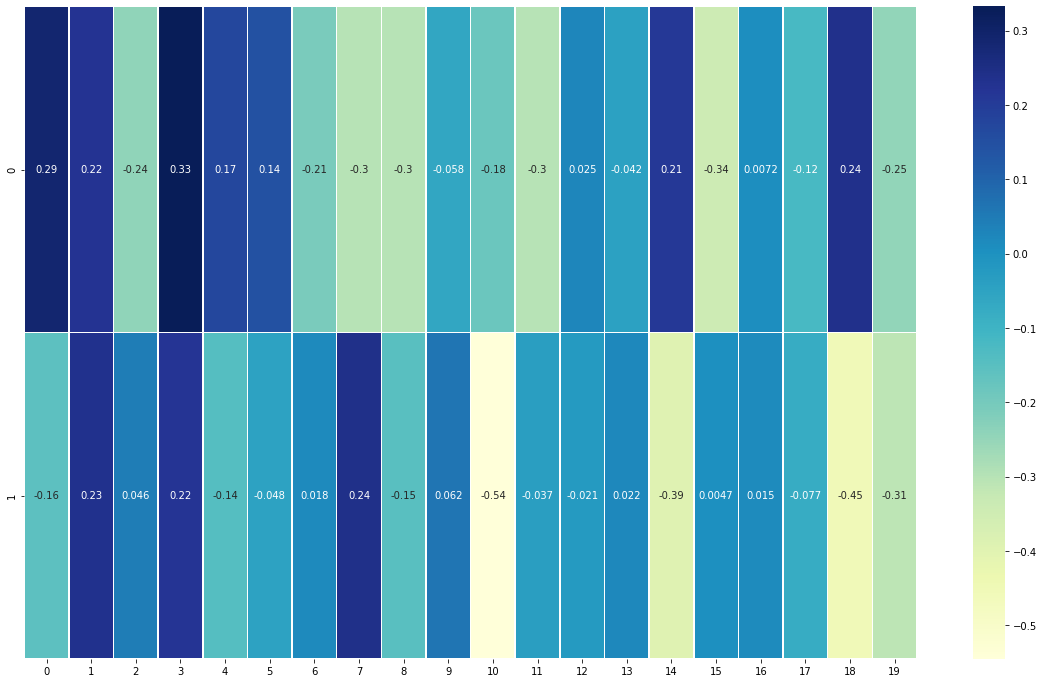

In [ ]:
map= pd.DataFrame(pca.components_,columns=list(X_train_pd.columns))
plt.figure(figsize=(20,12))
sns.heatmap(map,cmap="YlGnBu",annot=True, linewidths=0.5)